# The Graph Isomorphism Problem

### By Joshua Uzell

<a href="https://www.researchgate.net/figure/Three-isomorphic-representations-of-the-Petersen-graph_fig2_319135421"><img src="https://www.researchgate.net/publication/319135421/figure/fig2/AS:527817386934272@1502852879601/Three-isomorphic-representations-of-the-Petersen-graph.png" alt="Three isomorphic representations of the Petersen graph." style="height:200px;"/></a>
<h6>Fig 2. Three isomorphic representations of the Petersen graph.</h6>

When it comes to <b>Graph Theory</b> in computer science, there are many cases where problems can occur. One of the main ones is the <b>Graph Isomorphism problem</b>. In this notebook, we'll discuss the idea behind Graph Theory, Graph Isomorphism and the Babai Algorithm. At the end we'll implement basic coding solutions for solving this problem and we'll finish off the notebook with a summary, final thoughts and a conclusion section.

Note that the code sections of this notebook were aided by Open AI's ChatGPT, although in certain cases I have made personal changes to the code as well.

## What is Graph Theory?

According to an article done by Brilliant, **“Graph theory is the study of mathematical objects known as graphs, which consist of vertices (or nodes) connected by edges.”** (Lawrence et al., no date) Vertices/nodes are the objects in the graph represented by circles whereas edges are the connections between those vertices represented by lines, as shown in the graph below. 

<a href="https://www.geeksforgeeks.org/mathematics-graph-theory-basics/"><img src="https://cdncontribute.geeksforgeeks.org/wp-content/uploads/SIMPLE-GRAPH.jpg" alt="Three isomorphic representations of the Petersen graph." style="height:300px;"/></a>
<h6>SIMPLE-GRAPH by Chirag Manwani, 2021.</h6>

According to Brilliant, **“Any scenario in which one wishes to examine the structure of a network of connected objects is potentially a problem for graph theory”**. (Lawrence et al., no date) So if you can represent the relationship between a set of objects as a bunch of nodes and have connections between them represented as edges, then it is considered a graph. Lets take a look at how we can plot a simple graph using a python library called networkX which is used specifically for creating and manipulating networks of data in the form of graphs.

The code below shows a simple implementation of a graph. The first line sets the matplotlib backend to inline mode which allows us to show plots in the Jupyter notebook. After that we import the networkX and matplotlib libraries and then we create a complete graph that contains 3 nodes. Each node will be attached to an edge and will have a label to identify with.

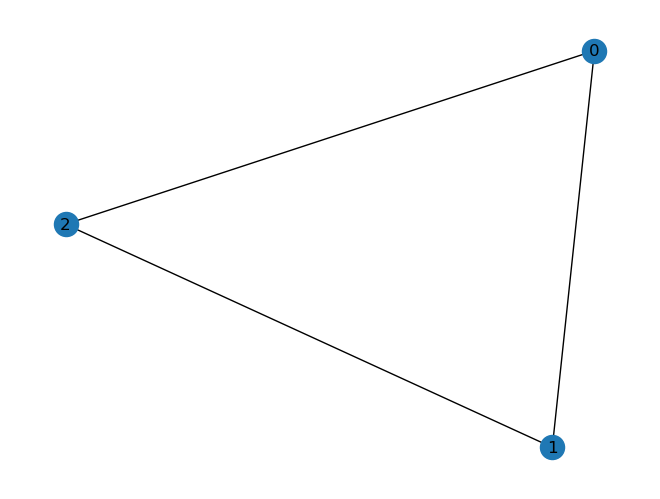

In [1]:
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt

G = nx.complete_graph(3)
nx.draw(G, with_labels=True)

Below is a line of code, that creates a histogram which shows the number of edges that are connected to a given node. This is also referred to as a degree. 

(array([0., 0., 0., 0., 0., 3., 0., 0., 0., 0.]),
 array([1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5]),
 <BarContainer object of 10 artists>)

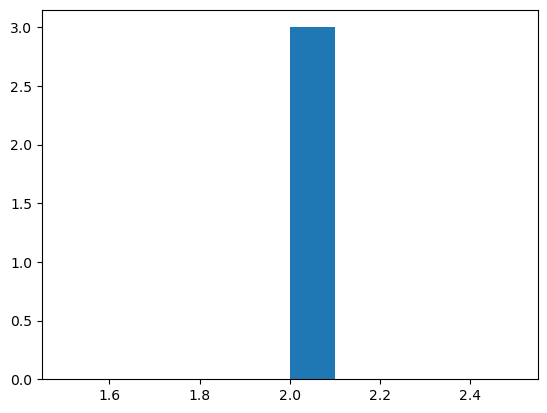

In [2]:
plt.hist([v for k, v in nx.degree(G)])

From the histogram, we can see on the horizontal line the number of edges that are connected to a certain node.  Whereas the vertical line displays the number of nodes that have a particular number of edges (a degree). Looking at this data, we can see that from the simple graph we drew, the 3 vertices all have 2 connected edges.

Now that we explored the basic idea of Graph Theory, it's time to cover the main topic of this notebook, **graph isomorphism**.

## What is Graph Isomorphism?

<a href="https://www.researchgate.net/figure/Example-of-graph-isomorphism_fig2_221614046"><img src="https://www.researchgate.net/profile/Ping-Chen-23/publication/221614046/figure/fig2/AS:305539612463105@1449857728258/Example-of-graph-isomorphism.png" alt="Example of graph isomorphism." style="height:250px;"/></a>
<h6>Figure 2: Example of graph isomorphism.<h6> 

**Graph Isomorphism** is a comparison between two graphs to see if they both look exactly the same structurally. In a description written by Royle from Wolfram MathWorld, he says that **“Two graphs which contain the same number of graph vertices connected in the same way are said to be isomorphic.”**(Royle, no date) which means they have the same structure. If we put two graphs beside eachother and we can see that it’s possible to have a 1 to 1 or bijective mapping between both of their vertices, and the structure and the number of vertices and edges are the same in both graphs, then they are said to be isomorphic. 

## The Problem

<img src="https://images.unsplash.com/photo-1518644730709-0835105d9daa?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=2070&q=80" alt="Picture of man thinking" style="height:300px;"/>

<h6>Photo by <a href="https://unsplash.com/@brucemars?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">bruce mars</a> on <a href="https://unsplash.com/photos/xj8qrWvuOEs?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a></h6>

The issue with **Graph Isomorphism** is that it’s one of the most notoriously difficult problems to solve in computer science. Because of this reputation it is known as an NP (nondeterministic polynomial time) problem. In an article done by John Loeffler from Interesting Engineering, **“NP problems do not have a known algorithm that can produce a result in polynomial time.”** (Loeffler, 2019) meaning that there is no solution to the issue if it were to grow in size. As a result, there have been many attempts by various computer scientists to try and solve the **Graph Isomorphism** problem close to or in polynomial time. 

## The Babai Algorithm

<img src="https://alchetron.com/cdn/lszl-babai-c29c4455-feee-4c57-b448-96978268e3e-resize-750.jpeg" height="200px">
<h6>Image of László Babai found via <a href="https://alchetron.com/L%C3%A1szl%C3%B3-Babai">https://alchetron.com/L%C3%A1szl%C3%B3-Babai</a> , n.d.</h6>

In theory, the **Babai Alogrithm** is recognised as one of the fastest algorithms to solve the graph isomorphism problem currently. It was created by **László Babai** who is both a computer scientist and a professor at the University of Chicago. (Babai, no date) In 2015, according to Erica Klarreich from Quanta Magazine, Babai had “**electrified the theoretical computer science community**” (Klarreich, 2015) with the introduction of his new algorithm. It appeared to be superior to a previous algorithm that held a 30 year record of being the most efficient at solving this problem. (Klarreich, 2015)

However in 2017, university professor **Harald Helfgott**, found a problem in the **Babai Alogrithm**, relating to an inaccuracy in measuring the time taking to solve the graph isomorphism problem using a divide-and-conquer tool known as the **“Split-or-Johnson”** routine. (Babai, 2017a) A few days later, Babai acknowledged the issue and made a statement on his homepage saying that he replaced a recursive call in the **“Split-or-Johnson”** routine, fixing the issue and then claiming “**that the Graph Isomorphism test runs in quasipolynomial time (now really).**” (Babai, 2017b) Helfgott then updated his blog on January 14th verifying that the proof was correct and that “**Babai is now giving an algorithm that works in quasipolynomial time.**” (valuevar, 2017)

<img src="https://www.sciencenews.org/wp-content/uploads/2015/11/111115_ag_isomorphism_feat_free.jpg" height="300px">
<h6>YOU FOLLOW? by Jeremy Kun, n.d.</h6>

The **Babai Algorithm** has proven to be a major breakthrough for computer science in terms of it's potential to get the **graph isomorphism** problem closer to being solved in polynomial time. The only drawback of this algorithm, is that due to the complexity of it’s design, it will be some time before a practical implementation of it is made. But regardless, it does show the potential of a quasipolynomial algorithm being used to solve the **Graph Isomorphism** problem.

## A basic solution to the Graph Isomorphism Problem

Even though we don't currently have a perfect solution for graph isomorphism, we can still use the tools we have to make an attempt at a basic solution to the problem and whilst it won't take exponential growth into consideration, it can still be used for solving the issue at a basic level.

First we will import the networkX and matplotlib libraries to create 2 new graphs that each have a list of edges.

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

# Create the first graph 
G1 = nx.Graph()
G1.add_edges_from([(1, 2), (1, 3), (2, 3), (2, 4), (3, 4)])

Every edge is represented in the list as a tuple. Each tuple contains 2 elements that represent the nodes that are found at the 2 endpoints of a given edge. As an example, we can see from the list above that one of the tuples contains the elements of 1 and 2. This tells us that there is an edge connecting between node 1 and node 2.

Now we will do the same for graph 2 with the same number of nodes and edges, but this time the edges are connected to different nodes.

In [4]:
# Create the second graph 
G2 = nx.Graph()
G2.add_edges_from([(1, 3), (1, 2), (3, 2), (2, 4), (3, 4)])

Now that we've created each graph, we can use an is_isomorphic function, that takes in 2 graphs as arguements and returns a boolean of true or false depending on whether the 2 graphs are isomorphic to each other or not. 

In [5]:
# Check if the two graphs are isomorphic
is_isomorphic = nx.is_isomorphic(G1, G2)

Now we will draw out the 2 graphs beside eachother and have every node labeled with a specific number so as to individually identify them.

True
The graphs below are isomorphic


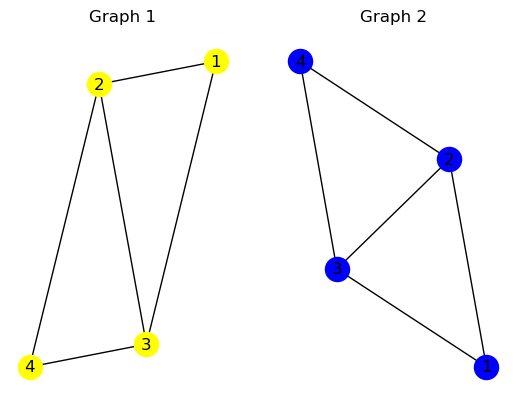

In [6]:
# Draw out the 2 graphs
plt.subplot(121)
nx.draw(G1, with_labels=True, node_color='yellow')
plt.title("Graph 1")
plt.subplot(122)
nx.draw(G2, with_labels=True, node_color='blue')
plt.title("Graph 2")

#Print out if the graphs are isomorphic or not
print(is_isomorphic)
print("The graphs below are isomorphic")

# Display the 2 graphs 
plt.show()

In the case of these 2 graphs, the value of is_isomorphic became true, which means that both graphs are isomorphic to one another.

Now lets see what happens when we have 2 graphs that are not isomorphic to eachother.

False
The graphs below are not isomorphic


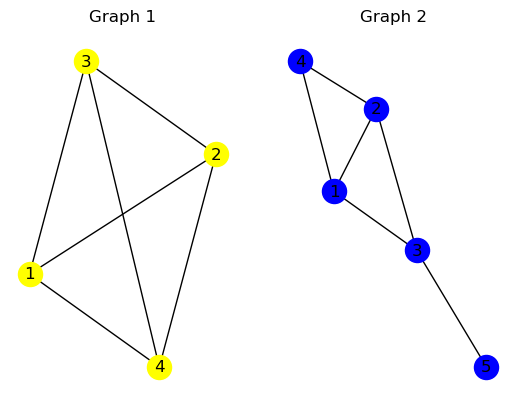

In [7]:
import networkx as nx
import matplotlib.pyplot as plt

# Create the first graph 
G1 = nx.Graph()
G1.add_edges_from([(1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4)])

# Create the second graph 
G2 = nx.Graph()
G2.add_edges_from([(1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 5)])

# Check if the two graphs are isomorphic
is_isomorphic = nx.is_isomorphic(G1, G2)

# Print out if the 2 graphs are isomorphic or not
print(is_isomorphic)
print("The graphs below are not isomorphic")

# Draw out the 2 graphs
plt.subplot(121)
nx.draw(G1, with_labels=True, node_color='yellow')
plt.title("Graph 1")
plt.subplot(122)
nx.draw(G2, with_labels=True, node_color='blue')
plt.title("Graph 2")

# Display the 2 graphs
plt.show()

From the above graph we can see the that the first graph has 4 nodes with 6 edges, and the second graph has 5 nodes with 6 edges. Whilst both graphs have the same number of edges, they don't have the same number of nodes, and the edges in both graphs are not aligned in the same way. Therefore, these graphs are not isomorphic to eachother.

## Solving Graph Isomorphism using Adjacency matrices

<a href="https://www.researchgate.net/figure/a-A-directed-graph-and-b-its-adjacency-matrix_fig2_239491573"><img src="https://www.researchgate.net/profile/Janet_Prichard/publication/239491573/figure/fig2/AS:669390177591317@1536606463620/a-A-directed-graph-and-b-its-adjacency-matrix.ppm" alt="6 6 a) A directed graph and b) its adjacency matrix" height="300px"/></a>
<h6>Figure 13.6 Figure 13.6 a) A directed graph and b) its adjacency matrix</h6>

An adjacency matrix is a representation of a graph in a mathematical format where each number indicates if 2 nodes are connected to eachother. For example, if a value between 2 different nodes is equal to 1, then it means there is a connecting edge between them, else if it's 0, then it means that either there is no edge connecting the 2 nodes or a node can't have an edge connecting to itself. According to MathWorld Wolfram an **“For a simple graph with no self-loops, the adjacency matrix must have 0s on the diagonal”**. (Weisstein. E, no date)

We can create an adjacency matrix using what's known as permutations. In general, a permutation is the rearranging of elements in a set in a distinct order. An example would be the numbers (1,2) which can be rearranged in 2 different ways which are (1,2) and (2,1). If this increased to (1,2,3), then we will increase the number of arrangements from 2 to 6. The bigger the set, the more arrangements there are. So when permutations are used in graph isomorphism, they are good for creating adjacency matrices where the rearrangement of nodes in a graph is important for checking if 2 graphs are structurally the same (that nodes have the same connections), even with the nodes being changed around in a different order.

Let's take a look at a coding example below for how to use adjancency matrices when solving for graph isomorphism.

In [8]:
import networkx as nx
import numpy as np
from itertools import permutations

# Create two graphs for G1 and G2
G1 = nx.Graph([(1, 2), (2, 3), (3, 4), (4, 1), (1, 3)])
G2 = nx.Graph([(5, 6), (6, 7), (7, 8), (8, 5), (5, 7)])

First we import the relevant libraries and then we create 2 new graphs. Since we are using permutations for this algorithm, we will import the itertools library to help with this.

In [9]:
# Creates a new adjacency matrix for a graph after applying a permutation of vertex labels
def relabeled_adjacency_matrix(G, perm):
    n = len(G.nodes())
    A = nx.adjacency_matrix(G).toarray()
    
    P = np.zeros((n, n), dtype=int)
    for i, node in enumerate(perm):
        P[i, node - min(G.nodes())] = 1  
        
    A_perm = P @ A @ P.T
    return A_perm

In the above code, we will write a function that will allow us to create a new adjacency matrix using permutations. First we pass in a graph and a permutation as 2 arguements. Then we get the number of nodes in graph 'G' and using the networkX library, we can get an adjacency matrix for 'G' and convert it into an array using NumPy. We store the array into a variable called 'A'.

We then use NumPy again to create a matrix full of zeros that we can go through using a for loop and assign a value of 1 to a position in the array that has a rearranged node label. We then assign this new permutation matrix to 'P'. 

Lastly we get a new adjacency matrix by multiplying the permutation, adjacency and transpose (flipped version) of 'P' matrices together. Once complete, a new adjacency matrix is returned from the function.

In [10]:
# checks if two graphs G1 and G2 are isomorphic by comparing 
# their adjacency matrices after applying all possible permutations of vertex labels for G2
def are_isomorphic(G1, G2):
    if G1.number_of_nodes() != G2.number_of_nodes() or G1.number_of_edges() != G2.number_of_edges():
        print("The 2 graphs are not isomorphic")
        return False

    A1 = nx.adjacency_matrix(G1).toarray()
    nodes2 = list(G2.nodes())
    
    for perm in permutations(nodes2):
        A2_perm = relabeled_adjacency_matrix(G2, perm)
        
        #Display the 2 adjacency matrices
        print("Adjacency Matrix 1")
        print(A1)
        print() #Creates a new line between each adjacency matrix
        print("Adjacency Matrix 2")
        print(A2_perm)
        print()

        if np.array_equal(A1, A2_perm):
            print("The 2 graphs are isomorphic")
            return True
    
    print("The 2 graphs are not isomorphic")
    return False

In the above function, we check to see if 2 graphs are isomorphic by comparing their 2 adjancency matrices after performing all the possible permutations of the node labels for the second graph.

First we pass in our 2 graphs as arguements. Then we check first if both graphs have the same number of nodes and edges. If they don't, we can immediately persume that they are not isomorphic. Otherwise we push forwared through the function. 

We then return a new adjacency matrix for the first graph and then get a number of nodes in the second graph. After that, we use a for-loop to iterate through all the possible permutations of the nodes in graph 2, and pass in each permutation as a arguement in the relabeled matrix function.

After that, we get a new adjacency matrix for the 2nd graph and then we check to see if the adjacency matrices of both graphs are the same using the "array_equals" function in NumPy. If they are the same, we return true. If not, we set it to false.

In [11]:
print(are_isomorphic(G1, G2))  

Adjacency Matrix 1
[[0 1 1 1]
 [1 0 1 0]
 [1 1 0 1]
 [1 0 1 0]]

Adjacency Matrix 2
[[0 1 1 1]
 [1 0 1 0]
 [1 1 0 1]
 [1 0 1 0]]

The 2 graphs are isomorphic
True


Finally we display the results we get from the algorithm. From printing out the result above, we can see that the 2 graphs are indeed isomorphic. 

## Summary

<a href="https://www.researchgate.net/figure/A-simple-undirected-graph-with-20-nodes-and-48-edges_fig1_289036860"><img src="https://www.researchgate.net/profile/P-Subbaraj/publication/289036860/figure/fig1/AS:350308980019202@1460531577653/A-simple-undirected-graph-with-20-nodes-and-48-edges.png" alt="A simple undirected graph with 20 nodes and 48 edges" height="300px"/></a>
<h6>Fig. 1: A simple undirected graph with 20 nodes and 48 edges</h6>

To summarize, we covered the basic idea of graph theory. We then went over graph isomorphism and the problem being faced by computer scientists today regarding this topic. We briefly went over László Babai's algorithm which in theory could solve the problem in quasipolynomial time. Lastly we did a basic solution to the GI problem as well as solving it using some adjacency matrices.

## Final Thoughts

Upon completing this notebook, I'm starting to appreciate the ideas behind graph theory. At the beggining of this module, the problems were straight forward and easy to solve, so it seemed unnecessary to draw out the graphs and break them out into different matrices. But as I did more research into graph theory and the graph isomorphism problem, I realised that the issues being faced were to do with the exponential size of the problem and not the problem itself, as it's deceptively easy at first to solve the issue. But when the graphs start to scale in size, the issues start to arise with it. 

## Conclusion

<img src="https://images.pexels.com/photos/5256526/pexels-photo-5256526.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1" height="300px">
<h6>Photo by Thirdman from <a href="https://www.pexels.com/photo/a-group-of-people-having-a-discussion-while-looking-at-laptop-5256526/">Pexels</a></h6>

In conclusion, graph isomorphism is an important concept in graph theory which checks to see if 2 graphs are isomorphic to eachother, based on their connections and structure. And whilst it isn't possible currently to solve this problem in polynomial time, we are getting closer to that goal with every passing year and within the next decade, I can definitely see a potential practical solution being created for this problem, that is either close to or in polynomial time.

## References

Babai, L. (2017a) Fixing the UPCC case of Split-or-Johnson. Available at: http://people.cs.uchicago.edu/~laci/upcc-fix.pdf.

Babai, L. (2017b) Graph Isomorphism January 9, 2017, The University of Chicago. Available at: http://people.cs.uchicago.edu/~laci/update.html.

Babai, L. (no date) László Babai Bruce V. and Diana M. Rauner Distinguished Service Professor, Departments of Computer Science and Mathematics, The University of Chicago. Available at: https://cs.uchicago.edu/people/laszlo-babai/.

Data abstraction and problem solving with Java : walls and mirrors - Scientific Figure on ResearchGate. Available from: https://www.researchgate.net/figure/a-A-directed-graph-and-b-its-adjacency-matrix_fig2_239491573 [accessed 28 March, 2023]

Efficient algorithms based on relational queries to mine frequent graphs - Scientific Figure on ResearchGate. Available from: https://www.researchgate.net/figure/Example-of-graph-isomorphism_fig2_221614046 [accessed 28 March, 2023]

Graphettes: Constant-time determination of graphlet and orbit identity including (possibly disconnected) graphlets up to size 8 - Scientific Figure on ResearchGate. Available from: https://www.researchgate.net/figure/Three-isomorphic-representations-of-the-Petersen-graph_fig2_319135421 [accessed 6 Feb, 2023]

Klarreich, E. (2015) ‘Landmark Algorithm Breaks 30-Year Impasse’, Quanta Magazine, December. Available at: https://www.quantamagazine.org/algorithm-solves-graph-isomorphism-in-record-time-20151214.

Kun, J. (n.d.) YOU FOLLOW?. Available at: https://www.sciencenews.org/article/new-algorithm-cracks-graph-problem [accessed 28 March, 2023]

Lawrence, C. et al. (no date) Graph Theory, Brilliant. Available at: https://brilliant.org/wiki/graph-theory/ [accessed: 28 March, 2023].

Loeffler, J. (2019) ‘P vs NP, NP-Complete, and an Algorithm for Everything’, Interesting Engineering, May. Available at: https://interestingengineering.com/innovation/p-vs-np-np-complete-and-an-algorithm-for-everything.

Manwani, C. (2021) SIMPLE-GRAPH. Available at: https://www.geeksforgeeks.org/mathematics-graph-theory-basics/ [accessed 3 March, 2023]

Mars, B. (2018) Image of Man thinking. Available at: https://unsplash.com/photos/xj8qrWvuOEs?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText [accessed 28 March, 2023]

Thirdman (2020) A Group of People Having a Discussion while Looking at Laptop. Available at: https://www.pexels.com/photo/a-group-of-people-having-a-discussion-while-looking-at-laptop-5256526/ [accessed 28 March, 2023]

Tolley, T. R., Franceschini, R. W. and Petty, M. D. (1995) Graph Isomorphism Algorithms: Investigation Of The Graph Isomorphism Problem. Available at: https://stars.library.ucf.edu/cgi/viewcontent.cgi?article=1105&context=istlibrary.

Unknown (n.d.) Image of László Babai. Available at: https://alchetron.com/L%C3%A1szl%C3%B3-Babai [accessed 28 March, 2023]

valuevar (2017) Graph isomorphism in subexponential time. Available at: https://valuevar.wordpress.com/2017/01/04/graph-isomorphism-in-subexponential-time/.

Sauras-Altuzarra, Lorenzo and Weisstein, Eric W. "Adjacency Matrix." From MathWorld--A Wolfram Web Resource. https://mathworld.wolfram.com/AdjacencyMatrix.html

Strength Pareto Evolutionary Algorithm based Multi-Objective Optimization for Shortest Path Routing Problem in Computer Networks - Scientific Figure on ResearchGate. Available from: https://www.researchgate.net/figure/A-simple-undirected-graph-with-20-nodes-and-48-edges_fig1_289036860 [accessed 28 March, 2023]

## End